In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [18]:
import pandas as pd

In [19]:
instagram_df_train=pd.read_csv('instatrain.csv')

In [21]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [30]:
import time
from sinchsms import SinchSMS

for i in range(len(instagram_df_train)):
    number = str(instagram_df_train['profile pic'][i])
    message = 'I love SMS!'
    client = SinchSMS(your_app_key, your_app_secret)
    print("Sending '%s' to %s" % (message, number))
    response = client.send_message(number, message)
    message_id = response['messageId']
    response = client.check_status(message_id)
    while response['status'] != 'Successful':
        print(response['status'])
        time.sleep(1)
        response = client.check_status(message_id)
        print(response['status'])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0


In [13]:
import time
from sinchsms import SinchSMS


for i in range(len(instagram_df_train)):
    number = '+yourmobilenumber'
    message = 'I love SMS!'
    client = SinchSMS(your_app_key, your_app_secret)
    print("Sending '%s' to %s" % (message, number))
    response = client.send_message(number, message)
    message_id = response['messageId']
    response = client.check_status(message_id)
    while response['status'] != 'Successful':
        print(response['status'])
        time.sleep(1)
        response = client.check_status(message_id)
        print(response['status'])

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

NameError: name 'your_app_key' is not defined

In [8]:
pip install sinchsms

  Created wheel for sinchsms: filename=sinchsms-1.0.4-py3-none-any.whl size=3423 sha256=c98962d065c4f3b5ccdce4911630c255f491a5d73509cf009133895224f2e0ef
  Stored in directory: /home/hp/.cache/pip/wheels/ef/86/c8/603473498d9521942cd52e94cd573f74a56e2aaafa9c805e72
Successfully built sinchsms
Note: you may need to restart the kernel to use updated packages.


In [4]:
#load the testing data
instagram_df_test=pd.read_csv('insta_test.csv')

In [5]:
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


MINI CHALLENGE #1

* Print the first and last 5 rows in both the training and testing DataFrames

In [6]:
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [7]:
instagram_df_test.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [8]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [9]:

instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


## Exploratory Data Analysis

In [10]:
# Getting DataFrame info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [11]:
#Get the statistical summary of the DataFrame
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [12]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [13]:
# Get the number of unique values in the "Profile Pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [14]:
#Get the number of unique values in "Fake" (Target Column)
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

MINI CHALLENGE # 2

* Perform Exploratory Data Analysis on the testing Dataset

In [15]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [16]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [17]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [18]:
instagram_df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

## Perform Data Visualization

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fake', ylabel='count'>

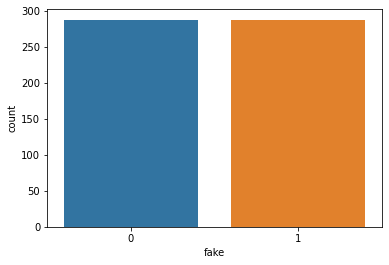

In [19]:
#Visualize the data
sns.countplot(instagram_df_train['fake'])

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='private', ylabel='count'>

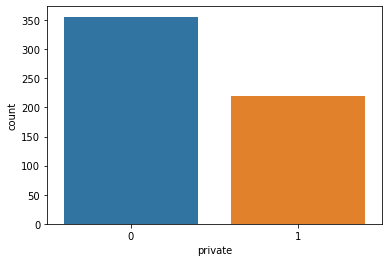

In [20]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='profile pic', ylabel='count'>

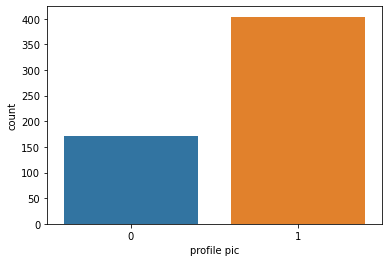

In [21]:
#Visualize the 'Profile pic' Column data
sns.countplot(instagram_df_train['profile pic'])

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nums/length username', ylabel='Density'>

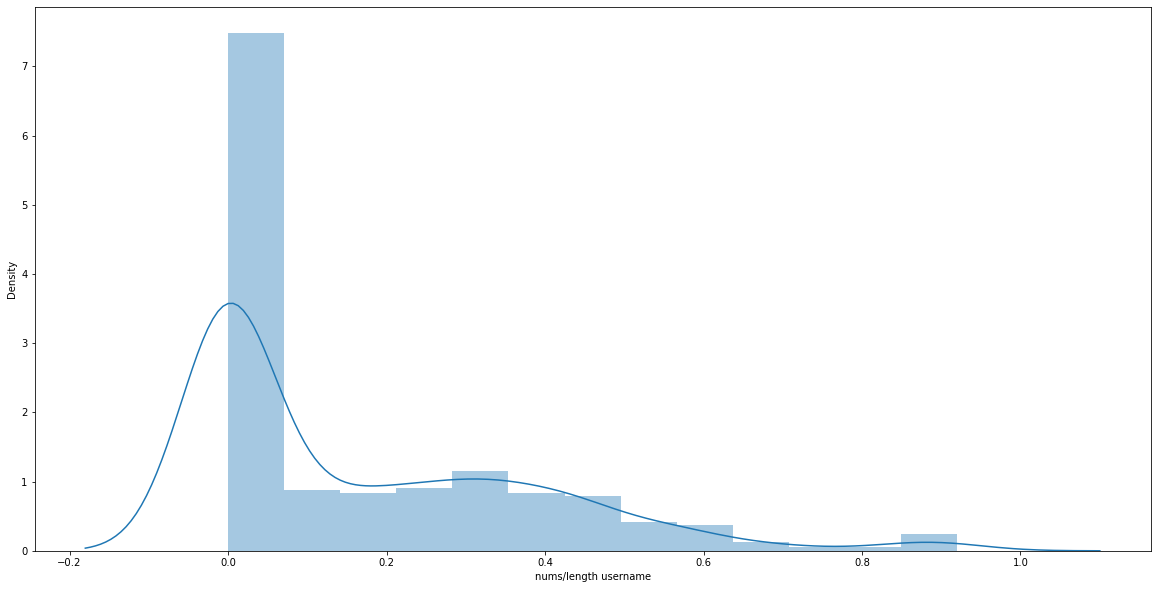

In [22]:
# Visualize the data
plt.figure(figsize=(20,10))
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 1440x1440 with 0 Axes>

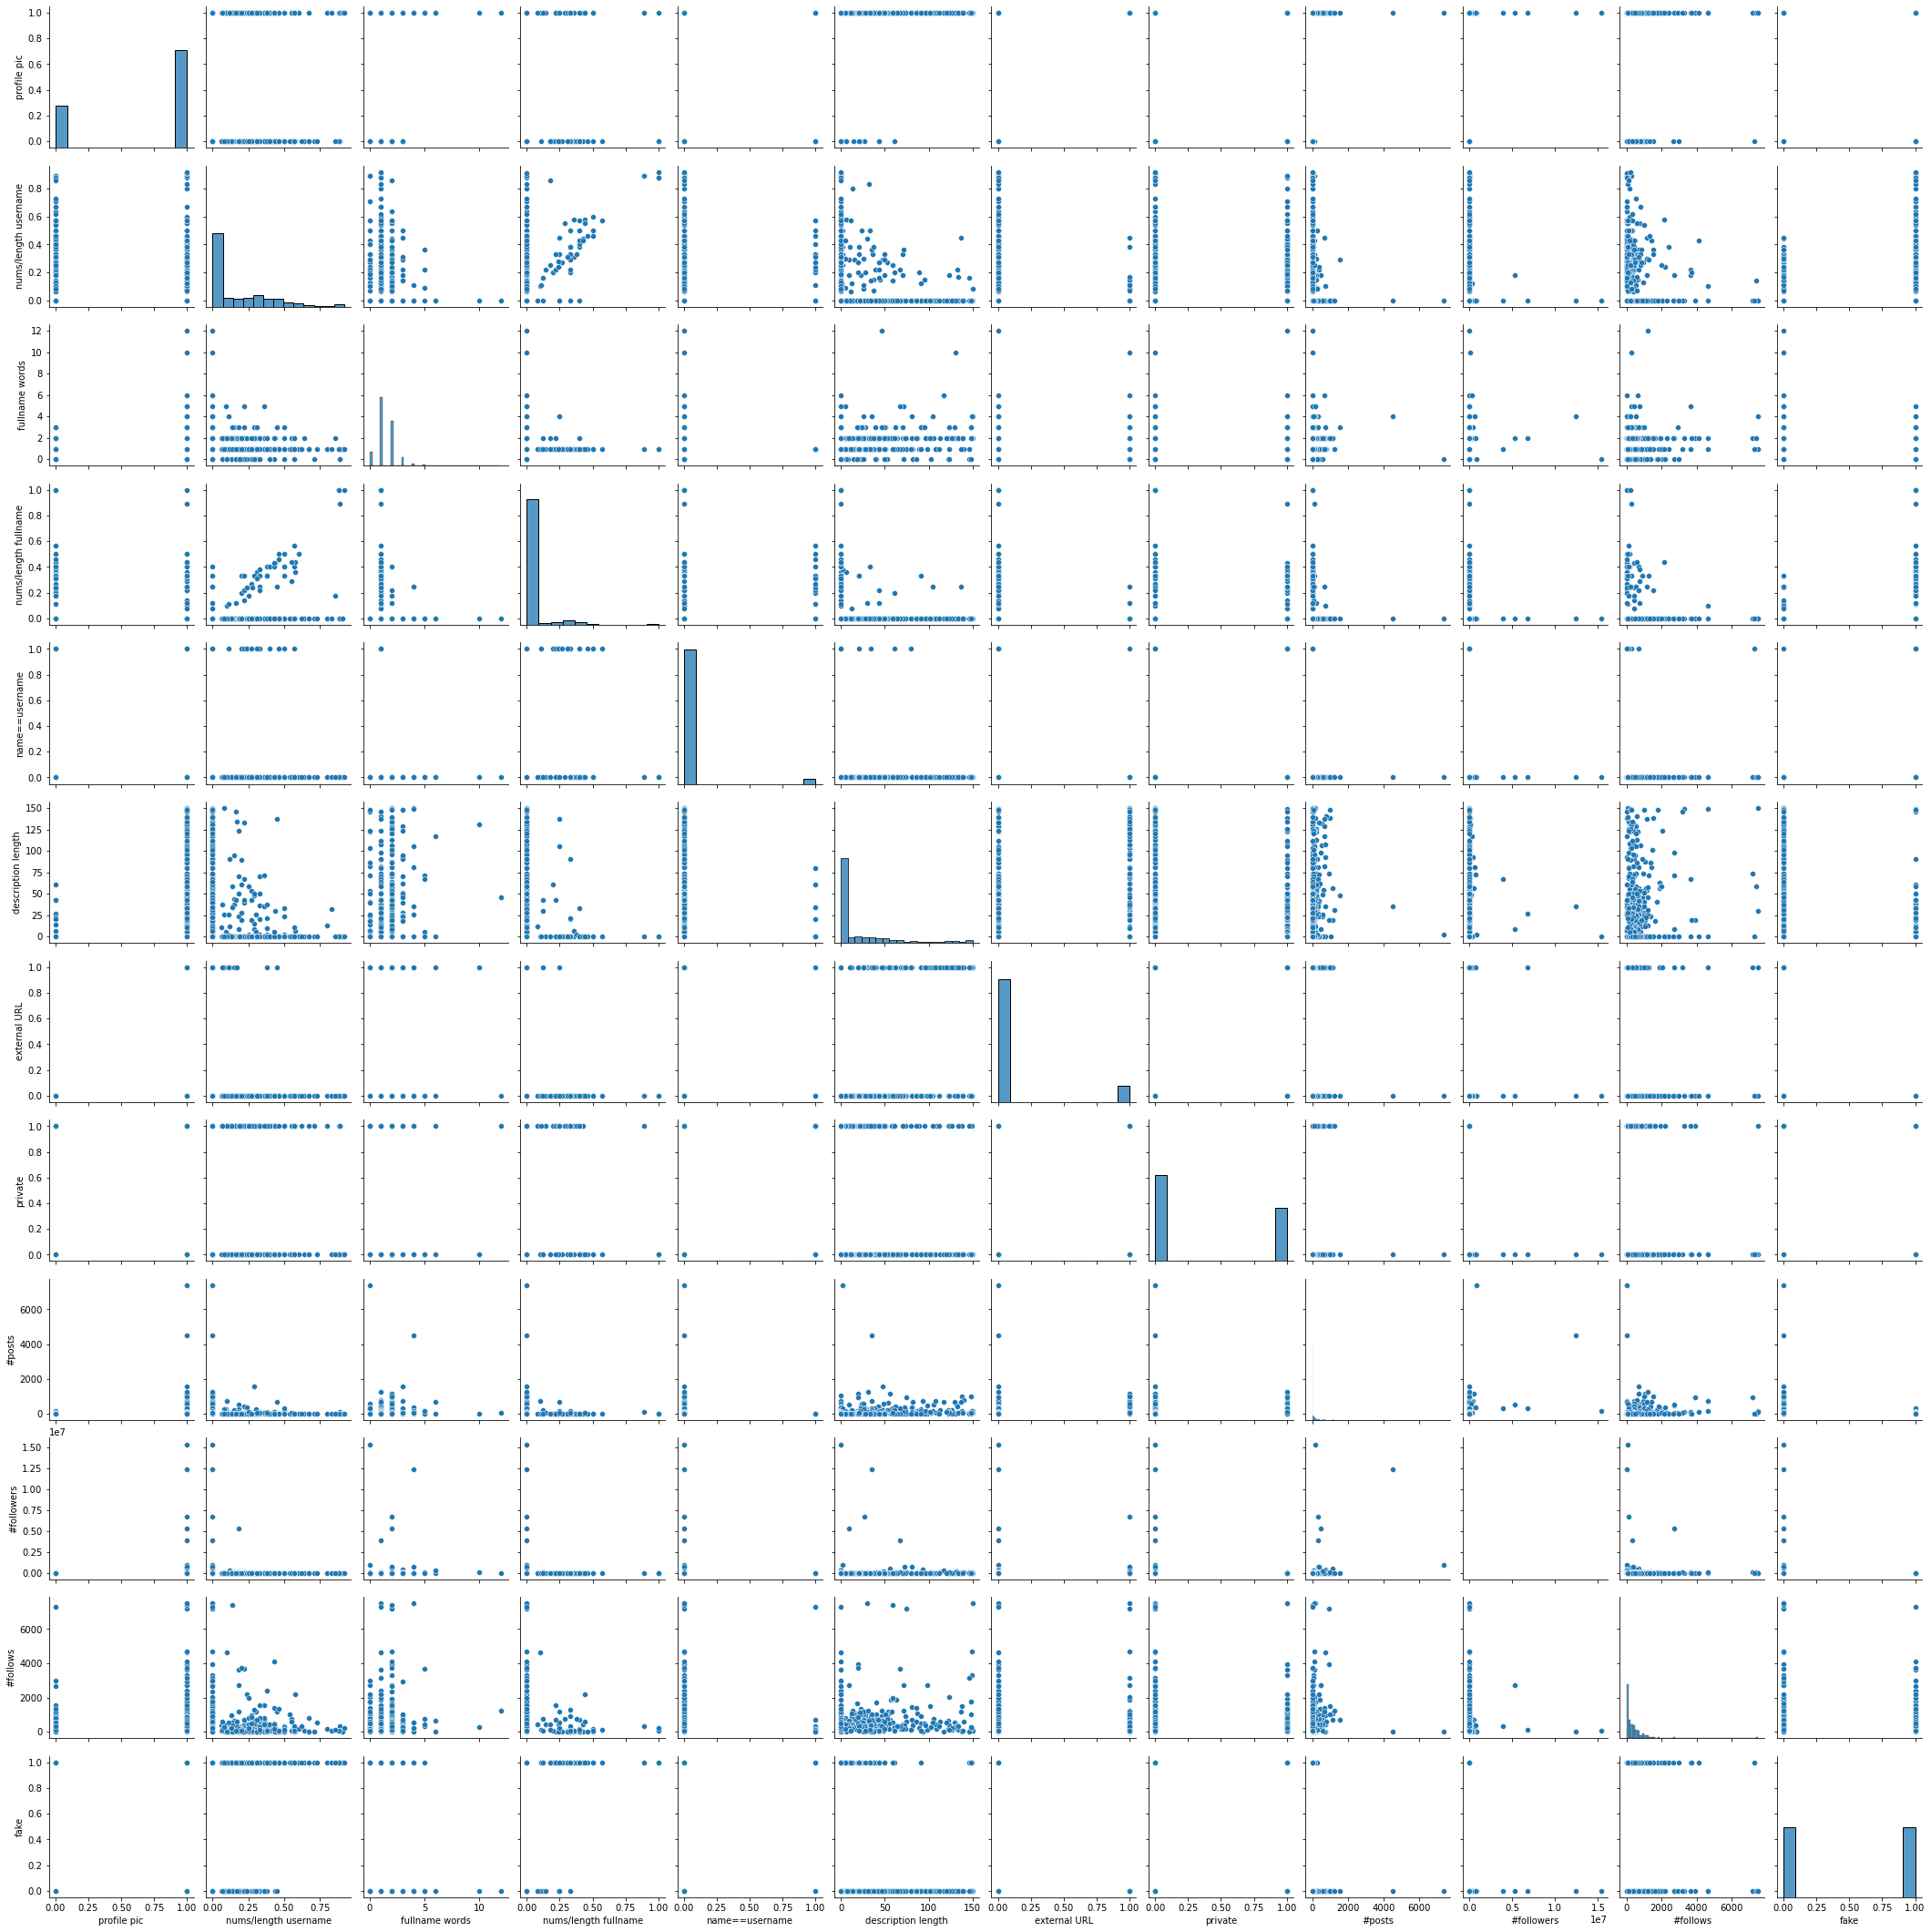

In [23]:
#Plot a Pairplot
plt.figure(figsize=(20,20))
sns.pairplot(instagram_df_train)

<Figure size 1440x1440 with 0 Axes>

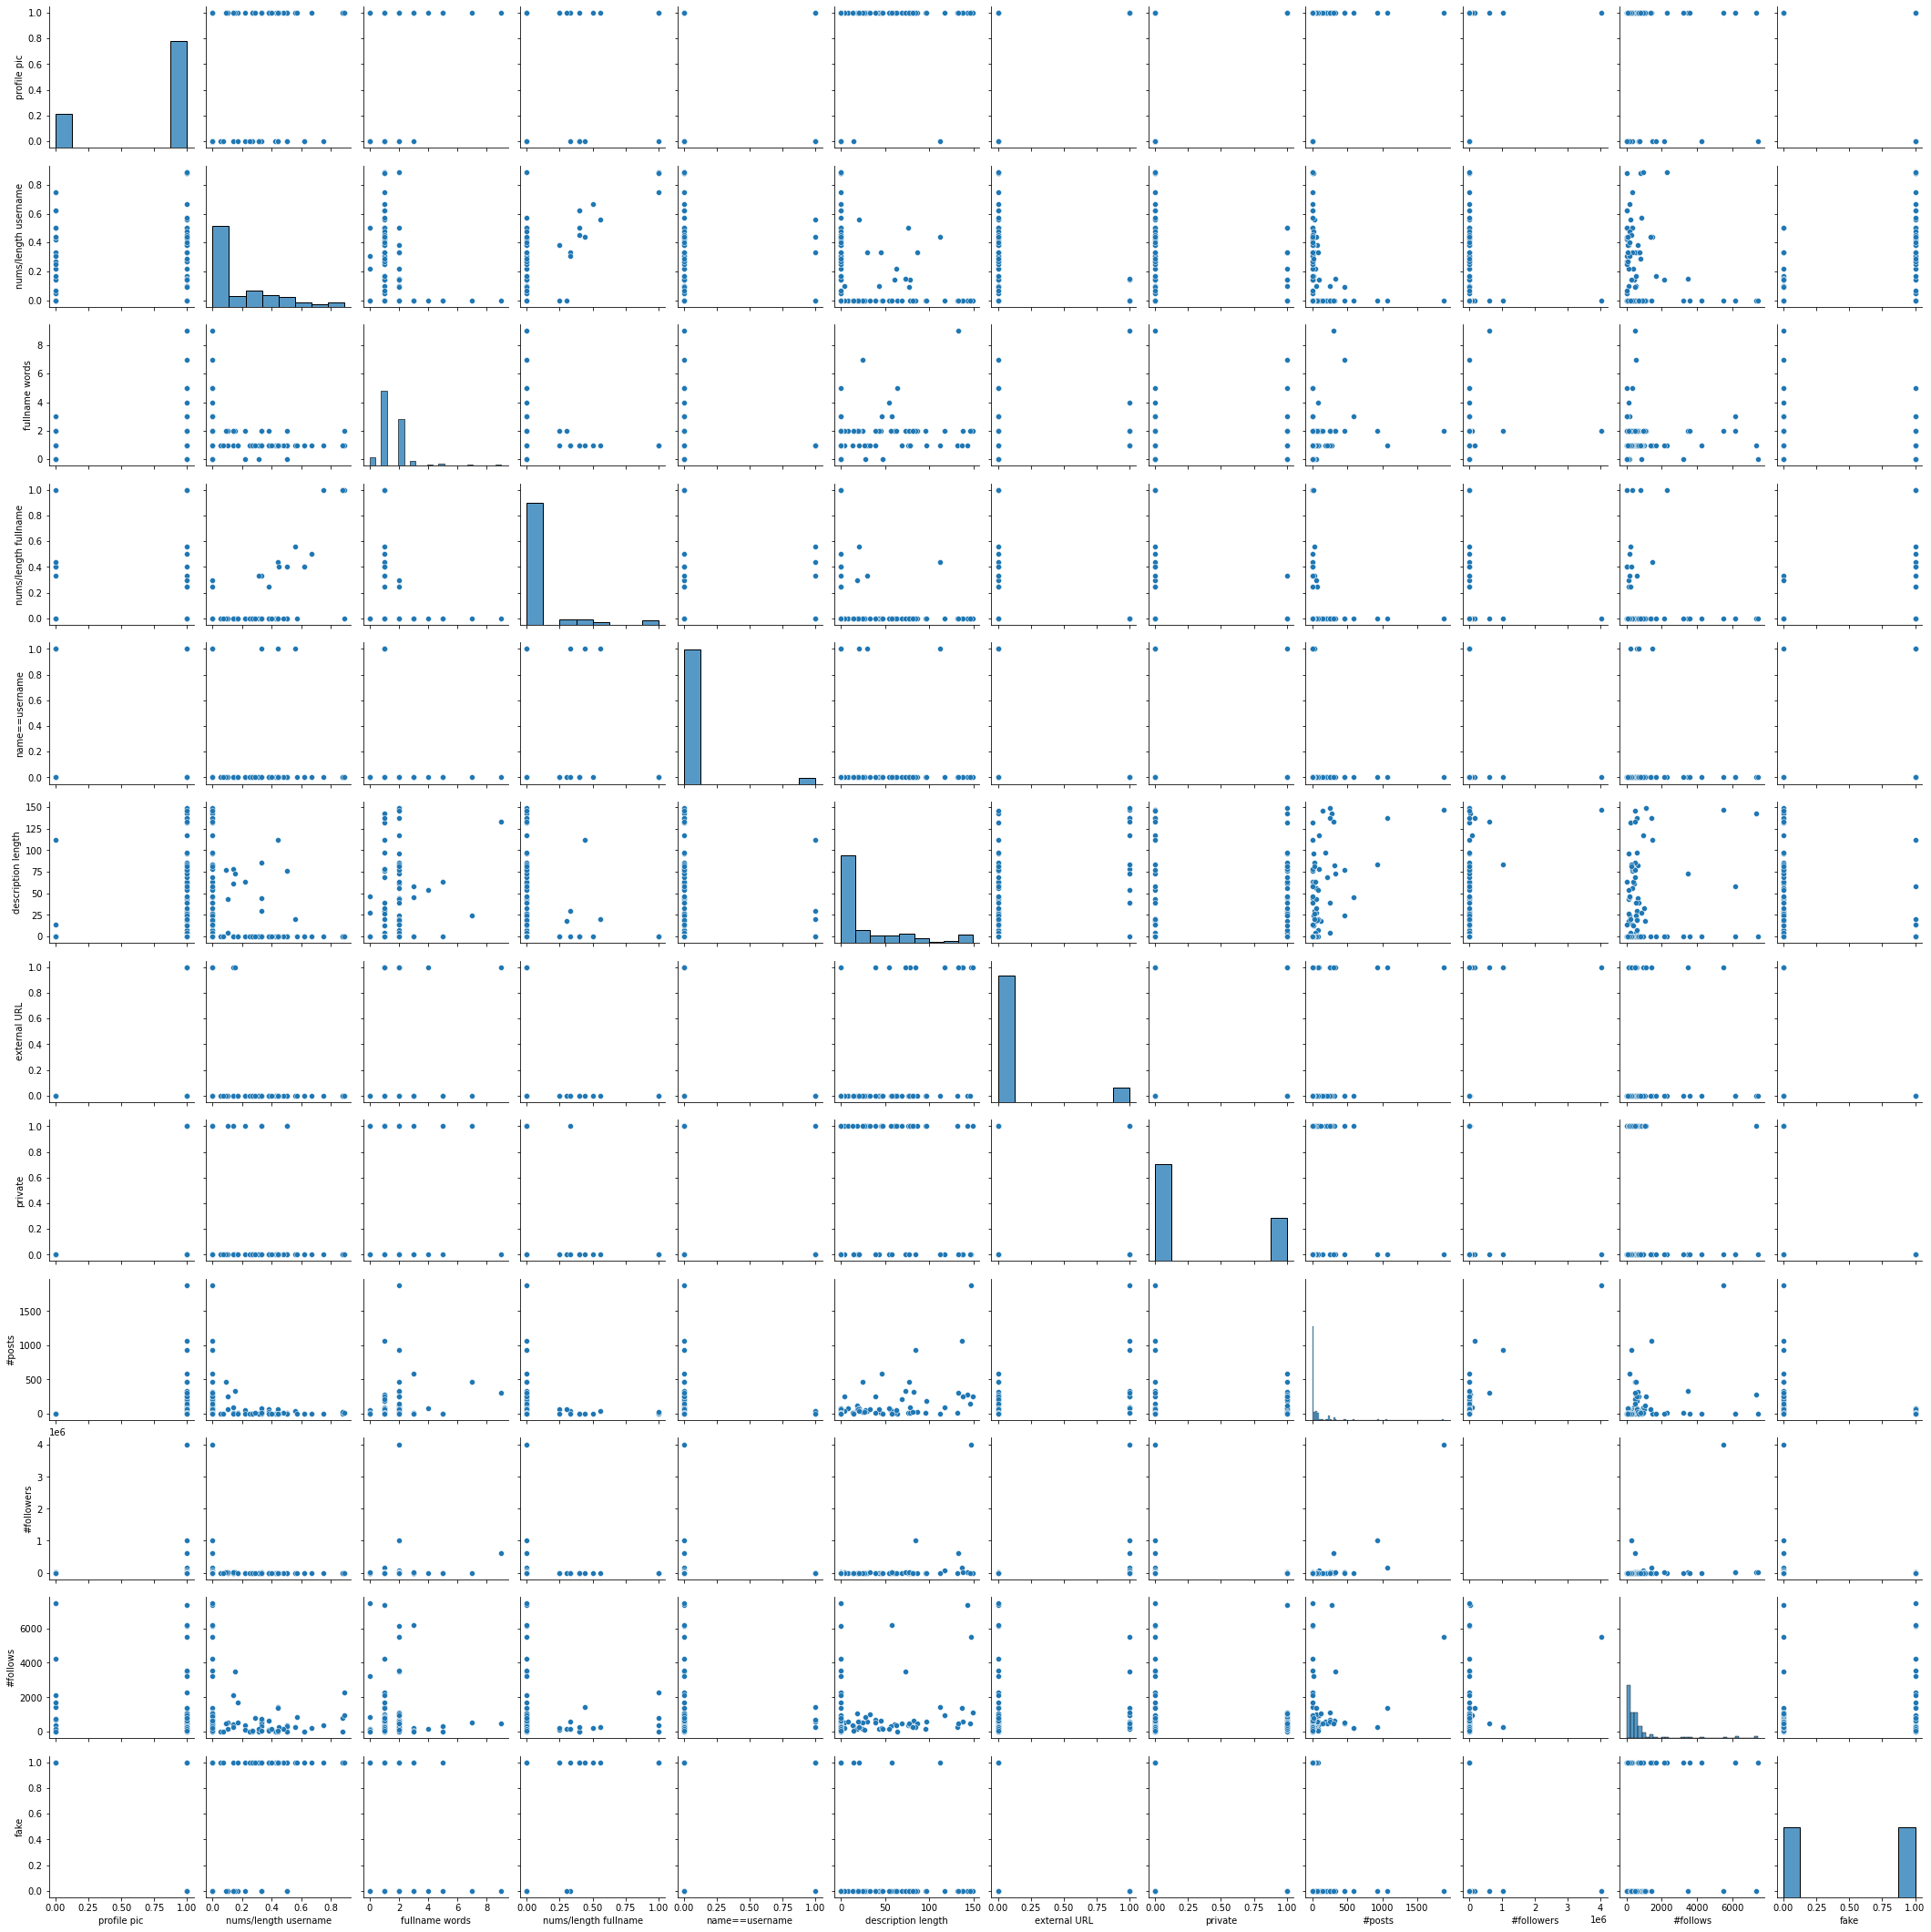

In [24]:
#Plot a Pairplot
plt.figure(figsize=(20,20))
sns.pairplot(instagram_df_test)

<AxesSubplot:>

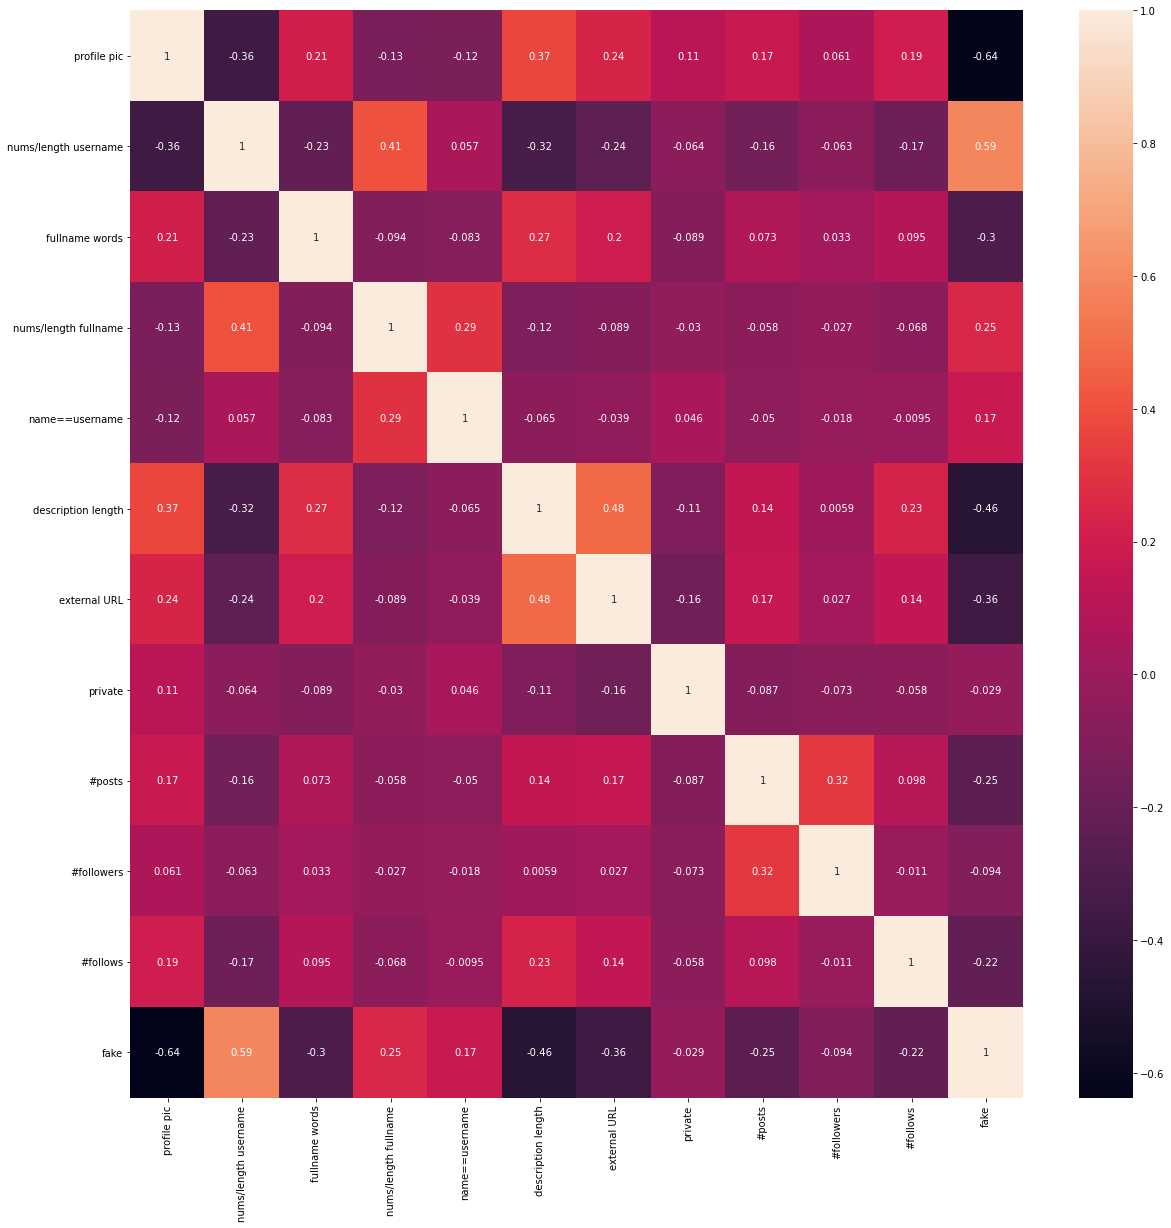

In [25]:
# Correlation plot
plt.figure(figsize=(20,20))
cm=instagram_df_train.corr()
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

<AxesSubplot:>

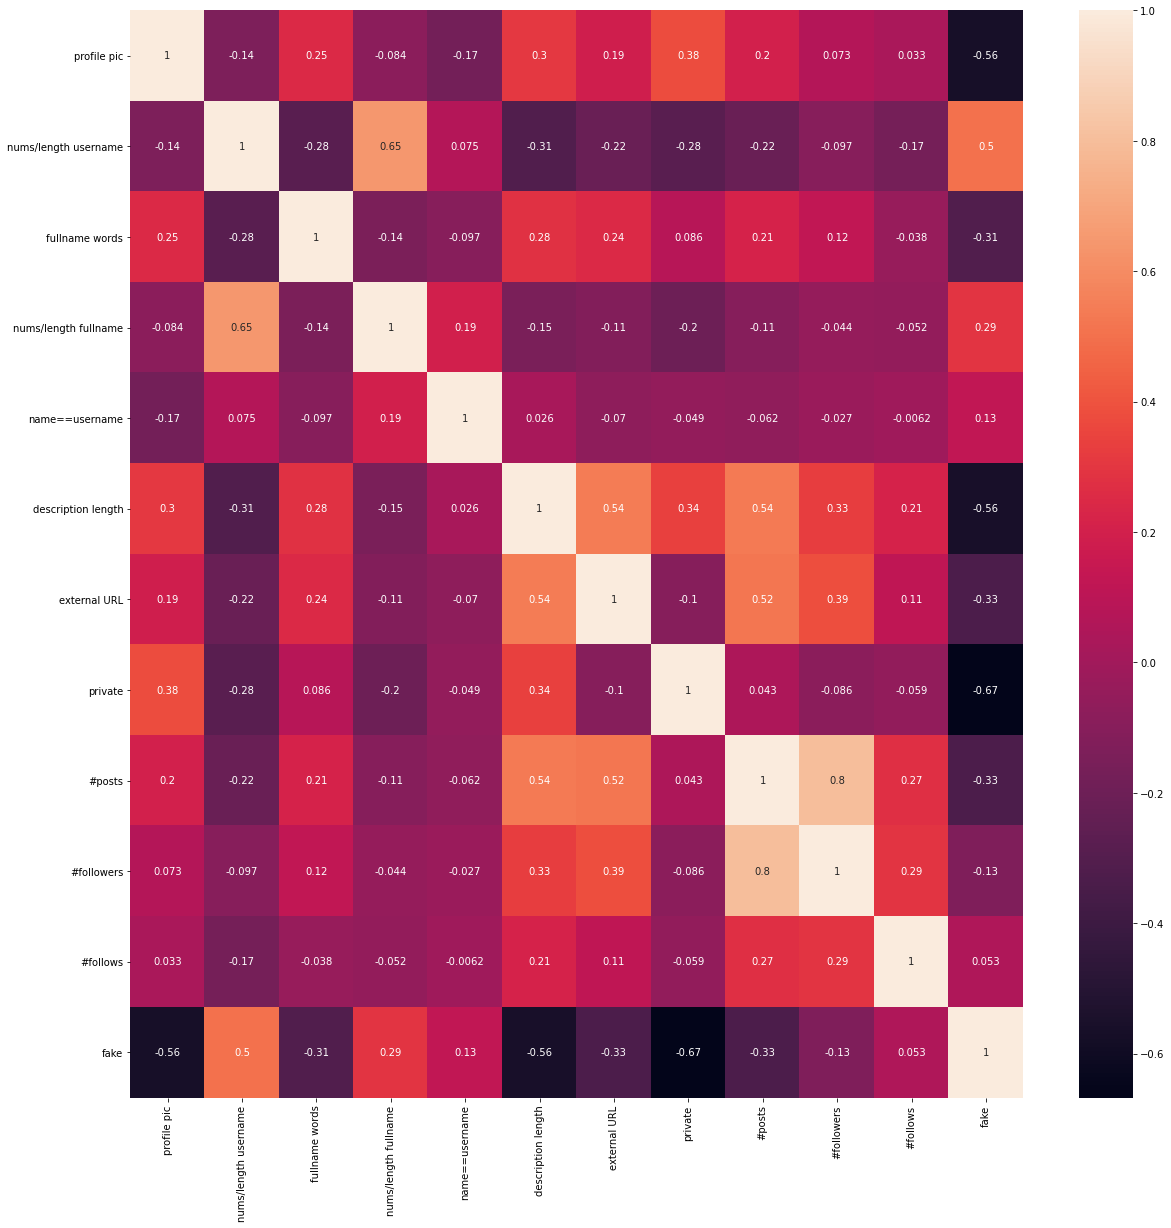

In [26]:
# Correlation plot
plt.figure(figsize=(20,20))
cm=instagram_df_test.corr()
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fake', ylabel='count'>

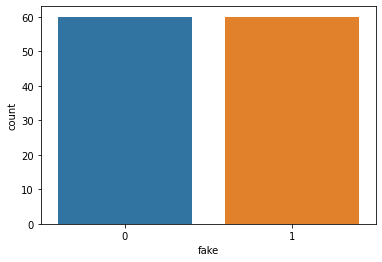

In [27]:
sns.countplot(instagram_df_test['fake'])

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='profile pic', ylabel='count'>

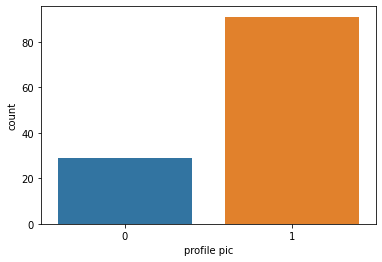

In [28]:
sns.countplot(instagram_df_test['profile pic'])

/home/hp/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='private', ylabel='count'>

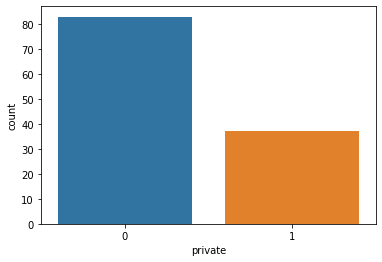

In [29]:
sns.countplot(instagram_df_test['private'])

## Task #5 Prepare the Data to Feed the Model

In [30]:
# Training and Testing dataset(inputs)
xtrain=instagram_df_train.drop(columns=['fake'])


In [31]:
xtrain

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [32]:
xtest=instagram_df_test.drop(columns=['fake'])

In [33]:
xtest

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [34]:
#Training and Testing Dataset(Outputs)
ytrain=instagram_df_train['fake']

In [35]:
ytrain

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [36]:
ytest=instagram_df_test['fake']

In [37]:
ytest

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [38]:
#Scale the data before training the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [39]:
scalerx=StandardScaler()
xtrain=scalerx.fit_transform(xtrain)
xtest=scalerx.transform(xtest)

In [40]:
xtrain

array([[ 0.65248952,  0.49629929, -1.38831247, ..., -0.18793216,
        -0.09271072,  0.48694486],
       [ 0.65248952, -0.76591601,  0.51339498, ...,  0.44440367,
        -0.09079728,  0.02684091],
       [ 0.65248952, -0.29842886,  0.51339498, ..., -0.23523287,
        -0.09363554, -0.44743686],
       ...,
       [ 0.65248952,  1.89876073,  0.51339498, ..., -0.25763847,
        -0.09370482, -0.18467607],
       [ 0.65248952,  1.89876073, -0.43745874, ..., -0.26759651,
        -0.09374771, -0.4746942 ],
       [ 0.65248952,  0.49629929, -0.43745874, ..., -0.26261749,
        -0.09364544, -0.0233126 ]])

In [41]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [42]:
ytrain=tf.keras.utils.to_categorical(ytrain,num_classes=2)
ytest=tf.keras.utils.to_categorical(ytest,num_classes=2)

In [43]:
ytrain

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

MINI CHALLENGE #3

* Print out the shapes of the training and testing datasets
* What is the % of the training and testing datasets?

In [44]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [45]:
Training_data=(len(xtrain)/(len(xtrain)+len(xtest)))*100

In [46]:
Training_data

82.75862068965517

In [47]:
Test_data=(len(xtest)/(len(xtrain)+len(xtest)))*100

In [48]:
Test_data

17.24137931034483

In [50]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(50,input_dim=11,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 12,077
Trainable params: 12,077
Non-trainable params: 0
____________________________________________________

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
epochs_hist=model.fit(xtrain,ytrain,epochs=20,verbose=1,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 24ms/step - loss: 0.5791 - accuracy: 0.7471 - val_loss: 0.4368 - val_accuracy: 0.8276
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3863 - accuracy: 0.8687 - val_loss: 0.2580 - val_accuracy: 0.8621
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.2952 - accuracy: 0.8996 - val_loss: 0.2052 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - loss: 0.2927 - accuracy: 0.8861 - val_loss: 0.1747 - val_accuracy: 0.9138
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 0.2364 - accuracy: 0.9131 - val_loss: 0.1760 - val_accuracy: 0.9138
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.2669 - accuracy: 0.9054 - val_loss: 0.1461 - val_accuracy: 0.9310
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.2266 - accuracy: 0.9151 - val_loss: 0.1450 - val_accuracy: 0.9310
Epoch 8/20
17/17 [=

## ASSESS THE PERFORMANCE OF TRAINED MODEL

In [53]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


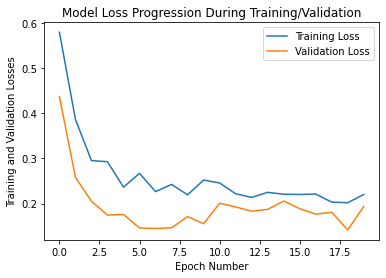

In [54]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [55]:
predicted=model.predict(xtest)

In [56]:
predicted

array([[5.90872020e-04, 9.99409080e-01],
       [9.78841484e-01, 2.11584698e-02],
       [9.92602408e-01, 7.39757484e-03],
       [9.98591959e-01, 1.40804623e-03],
       [2.64550030e-01, 7.35449970e-01],
       [9.28494692e-01, 7.15052634e-02],
       [8.72222722e-01, 1.27777278e-01],
       [9.75355208e-01, 2.46447772e-02],
       [9.50015128e-01, 4.99848761e-02],
       [9.03803587e-01, 9.61963832e-02],
       [9.43126142e-01, 5.68738244e-02],
       [9.99658823e-01, 3.41157749e-04],
       [9.33225870e-01, 6.67741001e-02],
       [6.62091374e-01, 3.37908596e-01],
       [8.56861293e-01, 1.43138692e-01],
       [9.74923551e-01, 2.50764191e-02],
       [7.71798909e-01, 2.28201166e-01],
       [9.62859929e-01, 3.71401273e-02],
       [9.98140812e-01, 1.85913453e-03],
       [9.91531670e-01, 8.46829452e-03],
       [1.49696255e-02, 9.85030353e-01],
       [8.53149176e-01, 1.46850854e-01],
       [8.85503531e-01, 1.14496425e-01],
       [9.77513433e-01, 2.24865489e-02],
       [9.447893

In [57]:
predicted_value=[]
test=[]
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in ytest:
    test.append(np.argmax(i))

In [58]:
print(classification_report(test,predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



<AxesSubplot:>

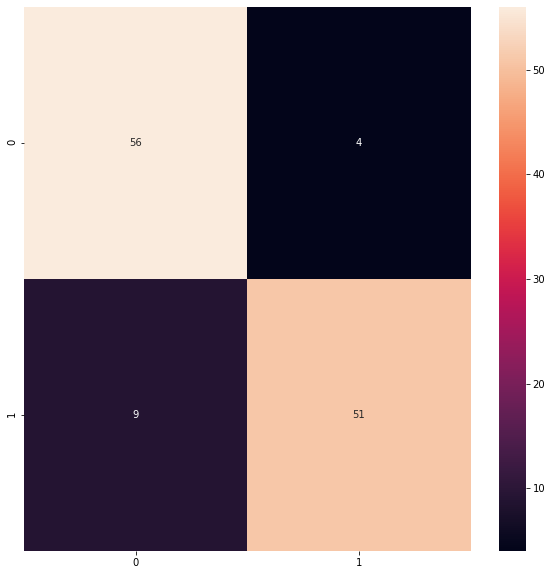

In [59]:
plt.figure(figsize=(10,10))
cm=confusion_matrix(test,predicted_value)
sns.heatmap(cm,annot=True)

In [60]:
56+51

107

In [61]:
107+13

120

## CONGRATULATIONS ON FINISHING THE PROJECT